# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [7]:
#temp.dtypes
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


*Respuesta: Las columnas "City" y "State" son strings, mientras que "Temperature" es de tipo float.*

#### Select the rows where state is New York

In [15]:
ejercicio1 = temp[temp["State"] == "New York"]
ejercicio1

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
state_ny["Temperature"].mean().round(2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [16]:
ejercicio2 = temp[temp["Temperature"] >= 15]
ejercicio2

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
#Existe una función en python para filtrar columnas. https://www.digitalocean.com/community/tutorials/how-to-use-the-python-filter-function-es

In [17]:
ejercicio3 = ejercicio2.filter(["City"])
ejercicio3

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [20]:
#condición1 temp[temp["Temperature"] > 15
#condición2 temp[temp["Temperature"] < 20

In [25]:
ejercicio4 = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]
ejercicio4

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [31]:
#lista de estados
estados = temp["State"].unique()
estados

array(['New York', 'Connecticut', 'New Jersey'], dtype=object)

In [41]:
ejercicio5 = {}
for e in estados:
    ejercicio5[e] = {}
    
    mean = temp[temp["State"] == e].mean().round(2)
    std = temp[temp["State"] == e].std().round(2)
    
    ejercicio5 [e]["mean"] = mean
    ejercicio5 [e]["std"] = std
#ejercicio5

In [42]:
pd.Series(ejercicio5)

New York       {'mean': [10.74], 'std': [8.13]}
Connecticut    {'mean': [15.83], 'std': [1.96]}
New Jersey     {'mean': [21.11], 'std': [1.57]}
dtype: object

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [43]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [44]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:xlabel='Salary', ylabel='Count'>

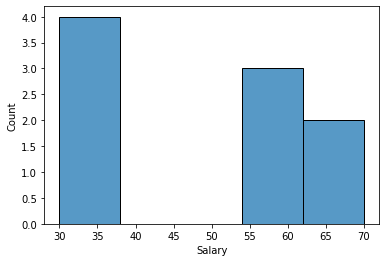

In [53]:
sns.histplot(x= employee["Salary"])

<AxesSubplot:xlabel='Years', ylabel='Count'>

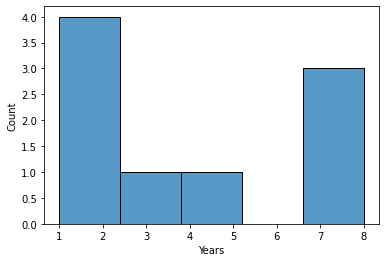

In [47]:
sns.histplot(x= employee["Years"])

En el caso de los salarios parece ser que hay dos grupos aquellos que perciben un saldo entre 30-37 y otros que perciben entre 58-70. Entre medias de dichos grupos no hay empleados.

Desde la perpectiva de los años todos los valores se concentran en el extremo inferior, especialemente en el rango de 1 a 2,3 años. Los demás valores se distribuyen entre 2,3 y 5,3 años y el resto en la parte de extremo superior de 6,8 a 8 años. De nuevo hay un rango en el que no hay empleados (5,3 a 6,8 años).

#### What's the average salary in this company?

In [55]:
ejercicio6 = employee["Salary"].mean().round(2)
ejercicio6

48.89

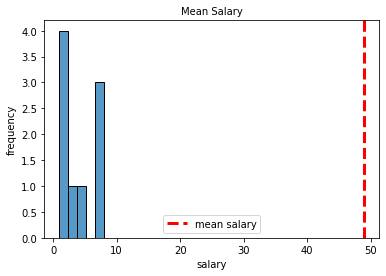

In [65]:
fig, ax = plt.subplots()

sns.histplot(x= employee["Years"], bins = 5)

# plot the mean
plt.axvline(
    employee["Salary"].mean().round(2),
    c = "red",
    linewidth= 3,
    linestyle= "--",
    label= "mean salary"
)

plt.title("Mean Salary", size=10)
plt.xlabel("salary")
plt.ylabel("frequency")
plt.legend()
plt.show()

#### What's the highest salary?

In [68]:
ejercicio7 = employee["Salary"].max()
ejercicio7

70

#### What's the lowest salary?

In [69]:
ejercicio8 = employee["Salary"].min()
ejercicio8

30

#### Who are the employees with the lowest salary?

In [75]:
ejercicio9 = employee[employee["Salary"] == 30]
ejercicio9

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [76]:
ejercicio10 = employee[employee["Name"] == "David"]
ejercicio10

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [77]:
#vuelvo a usar la función filter como en el challenge 1
ejercicio11 = employee[employee["Name"] == "David"].filter(["Salary"])
ejercicio11

,Salary
2,30


#### Print all the rows where job title is associate

In [78]:
ejercicio12 = employee[employee["Title"] == "associate"]
ejercicio12

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [79]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [80]:
# your answer here- 2nd method
employee[employee.index.isin(range(3))]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [82]:
ejercicio13 = employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]
ejercicio13

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [84]:
ejercicio14 = employee.groupby("Years").mean()
ejercicio14

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [85]:
ejercicio14 = employee.groupby("Title").mean()
ejercicio14

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


In [87]:
ejercicio14.filter(["Salary"])

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

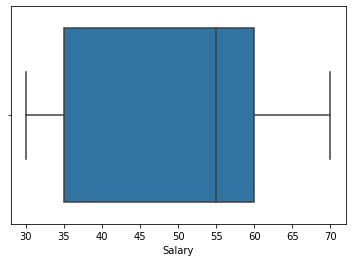

In [88]:
# draw boxplot here
sns.boxplot(x="Salary", data=employee)

In [89]:
# print first quartile here
Q1 = employee["Salary"].quantile(0.25)
Q1

35.0

In [90]:
# print third quartile here
Q3 = employee["Salary"].quantile(0.75)
Q3

60.0

Tal y como observamos en el diagrama la mayor parte de empleados se concentra en el 25% con salarios de entre 55-60, en el segundo cuartil los valores son más dispersos de entre 35-55.

#### Is the mean salary per gender different?

In [94]:
ejercicio15 = employee.groupby("Gender").mean()
ejercicio15.filter(["Salary"])

,Salary
Gender,
F,47.5
M,50.0


Existe una diferencia pero en general se encuentran bastante cerca

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [113]:
columnas = ["Years", "Salary"]
ejercicio16 = {}

for c in columnas:
    ejercicio16[c] = {}
    
    mean = employee.groupby("Department").mean().round(2).filter([c])
    max_ = employee.groupby("Department").max().filter([c])
    min_ = employee.groupby("Department").min().filter([c])
    
    ejercicio16[c]["mean"] = mean
    ejercicio16[c]["max"] = max_
    ejercicio16[c]["min"] = min_
#ejercicio16

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [115]:
orders = pd.read_csv("Orders.zip")
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [116]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [117]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [119]:
ejercicio17 = orders["UnitPrice"].mean().round(2)
ejercicio17

3.12

#### What were the highest and lowest purchase prices? 

In [120]:
# your answer here
ejercicio18 = orders["UnitPrice"].max().round(2)
ejercicio18

8142.75

In [121]:
# your answer here
ejercicio18 = orders["UnitPrice"].min().round(2)
ejercicio18

0.0

#### Select all the customers we have in Spain

In [125]:
ejercicio19 = orders[orders["Country"] == "Spain"]
ejercicio19.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
49696,80704,543055,21654,2011,2,4,10,ridged glass finger bowl,12,2011-02-03 10:41:00,1.45,12502,Spain,17.4
224883,315704,564734,72132,2011,8,7,13,columbian cube candle,2,2011-08-28 13:32:00,1.95,12484,Spain,3.9
394720,535258,581193,84535B,2011,12,3,17,fairy cakes notebook a6 size,2,2011-12-07 17:05:00,0.65,17097,Spain,1.3
351211,476949,577039,23229,2011,11,4,13,vintage donkey tail game,6,2011-11-17 13:30:00,3.75,12539,Spain,22.5
144925,208131,555095,22973,2011,5,2,13,children's circus parade mug,12,2011-05-31 13:32:00,1.65,12540,Spain,19.8


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [131]:
#ejercicio19["CustomerID"].value_counts()
len(ejercicio19.CustomerID.value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [132]:
ejercicio20 = orders[orders["Quantity"] > 50]
ejercicio20.filter(["CustomerID"])

,CustomerID
46,13748
83,15291
96,14688
102,14688
174,16029
...,...
397720,18102
397721,16626
397729,16626
397761,15311


#### Select orders from Spain that are above 50 items

In [134]:
ejercicio21 = orders[(orders["Quantity"] > 50) & (orders["Country"] == "Spain")]
ejercicio21.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
174443,248798,558871,20727,2011,7,1,13,lunch bag black skull.,100,2011-07-04 13:19:00,1.45,12557,Spain,145.00
197170,282909,561669,23296,2011,7,4,17,set of 6 tea time baking cases,128,2011-07-28 17:09:00,1.04,12507,Spain,133.12
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
366327,495740,578321,84997B,2011,11,3,16,childrens cutlery retrospot red,72,2011-11-23 16:59:00,3.75,12557,Spain,270.00
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00


#### Select all free orders

In [137]:
ejercicio22 = orders[orders["amount_spent"] == 0]
ejercicio22.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
128641,187613,553000,47566,2011,5,4,15,party bunting,4,2011-05-12 15:21:00,0.0,17667,United Kingdom,0.0
353097,479546,577168,M,2011,11,5,10,manual,1,2011-11-18 10:42:00,0.0,12603,Germany,0.0
256263,358655,568158,PADS,2011,9,7,12,pads to match all cushions,1,2011-09-25 12:22:00,0.0,16133,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [139]:
ejercicio23 = orders[orders["Description"].str.contains("lunch bag")]
ejercicio23.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
189457,271547,560700,23208,2011,7,3,12,lunch bag vintage leaf design,2,2011-07-20 12:38:00,1.65,17229,United Kingdom,3.30
93597,140465,548405,20727,2011,3,4,9,lunch bag black skull.,10,2011-03-31 09:48:00,1.65,17088,United Kingdom,16.50
340865,463164,576054,20728,2011,11,7,14,lunch bag cars blue,1,2011-11-13 14:55:00,1.65,15787,United Kingdom,1.65
316176,431774,573748,23207,2011,11,2,9,lunch bag alphabet design,10,2011-11-01 09:24:00,1.65,14911,EIRE,16.50
355565,482672,577482,23208,2011,11,7,11,lunch bag vintage leaf design,5,2011-11-20 11:43:00,1.65,16762,United Kingdom,8.25


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [143]:
ejercicio24= ejercicio23[ejercicio23["year"] == 2011]
ejercicio24.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
253624,355238,567912,22383,2011,9,4,17,lunch bag suki design,3,2011-09-22 17:07:00,1.65,15555,United Kingdom,4.95
395876,538166,581400,22382,2011,12,4,13,lunch bag spaceboy design,5,2011-12-08 13:36:00,1.65,14056,United Kingdom,8.25
38614,64491,541631,20726,2011,1,4,10,lunch bag woodland,10,2011-01-20 10:48:00,1.65,12637,France,16.50
379394,513917,579629,22384,2011,11,3,12,lunch bag pink polkadot,2,2011-11-30 12:16:00,1.65,14963,United Kingdom,3.30
208595,296767,562932,22383,2011,8,3,16,lunch bag suki design,2,2011-08-10 16:39:00,1.65,16904,United Kingdom,3.30


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Density'>

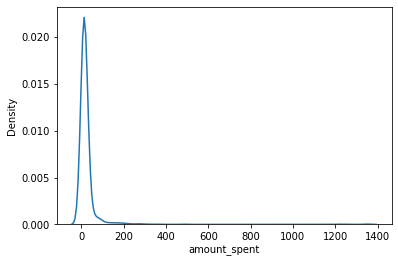

In [144]:
sns.kdeplot(x=ejercicio19["amount_spent"])

#### Select all orders made in the month of August

In [145]:
ejercicio25 = orders[orders["month"] == 8]
ejercicio25.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
202004,288632,562200,22192,2011,8,3,12,blue diner wall clock,2,2011-08-03 12:21:00,8.50,17719,United Kingdom,17.00
213134,302948,563498,23285,2011,8,2,16,pink vintage spot beaker,8,2011-08-16 16:17:00,0.85,17719,United Kingdom,6.80
204424,291634,562466,22480,2011,8,5,11,red tea towel classic design,36,2011-08-05 11:49:00,1.25,13435,United Kingdom,45.00
212502,302223,563404,20682,2011,8,2,11,red retrospot childrens umbrella,6,2011-08-16 11:04:00,3.25,16303,United Kingdom,19.50
220044,310250,564172,21174,2011,8,2,14,pottering in the shed metal sign,2,2011-08-23 14:19:00,2.08,16033,United Kingdom,4.16


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

#### What's the  average amount of money spent by country

In [157]:
ejercicio26 = orders.groupby("Country").amount_spent.mean()
ejercicio26

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [159]:
orders["UnitPrice"].max()

8142.75

In [161]:
ejercicio27 = orders[orders.UnitPrice == 8142.75]
ejercicio27

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [162]:
ejercicio28 = orders.groupby("year").amount_spent.mean()
ejercicio28

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64